# Bonus Code: Visualise Markov Chains

Here is some bonus code that was used to make the markov chain visualisations of the nursery rhymes shown in the lecture slides. It isn't 100% perfect and larger texts probably won't be displayed very well. But it should help give an understanding of how we turn sequences into a series of states with probabilities between transitions of states. 

To run the code you will first need to install the library `networkx`:

In [2]:
!pip install networkx

Now lets do some imports:

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

Now lets load our nursery rhyme and clean it up:

In [4]:
f = open("../data/nursery-rhymes/row-row-row-your-boat.txt", "r")

nursery_rhyme = f.read()
nursery_rhyme = nursery_rhyme.lower().replace('\n', ' ').replace(',', '').replace('.', '')

## Calculate Markov Chain and represent it as a network

In this code we will be using the networkx library to represent our network, or known as a *graph* in mathematics. The code works as follows:
- Take a list of tokens (which we can set as being words or characters) and finds each unique token, which becomes each of our states (assuming we have a state size of 1). 
- Count which token (or state) occurs after another (our *transitions*) in our entire sequence. 
- Calculate our probabilities of going from one state to another by dividing the counts for each transition by the total number of count for each state.
- Return the network (aka graph) so we can then visualise it.

Some terminology that might be new:
- **Graph** -- aka network
- **Node** -- each point in the network, which in this case is our token (in mathematics a node is also called a vertex)
- **Edge** -- the links or connections between nodes in a network

![network diagram](../media/network%20diagram.png)

**Don't worry if you don't understand all of this code, it is quite complicated!** The code is here for you to get a better understanding of Markov Chains and run your own visualisations on your own texts.

In [5]:
def calculate_graph_from_token_list(token_list):
    # Create a directed graph
    G = nx.DiGraph()

    # Create a dictionary to store transition counts
    transition_counts = defaultdict(int)

    # Calculate transition probabilities
    for i in range(len(token_list) - 1):
        current_state = token_list[i]
        next_state = token_list[i + 1]
        transition_counts[(current_state, next_state)] += 1

    # Calculate total transitions from each state
    state_counts = defaultdict(int)
    for (current_state, _), count in transition_counts.items():
        state_counts[current_state] += count

    # Add nodes for each state
    for state in set(token_list):
        G.add_node(state)

    # Add edges with transition probabilities as weights
    for (current_state, next_state), count in transition_counts.items():
        probability = count / state_counts[current_state]
        G.add_edge(current_state, next_state, weight=probability)

    return G

## Visualising a Markov Chain of words

Here we are visualising a Markov Chain based on words using our nursery rhyme (with a state size of 1). For this we will make our list of tokens by splitting the nursery rhyme string with the whitespace character (`' '`). 

We will then use the networkx library to render our visualisation. Try changing the line `pos = nx.circular_layout(G)` to [one of the other layouts](https://networkx.org/documentation/stable/reference/drawing.html) supported in the networkx library to see how that effects the visualisation. 

Note: We cannot see the the labels for the edges that refer back to the same node (if you set `node_size` to `0` the circles won't be drawn and you can see these labels are directly underneath the nodes). This is a bug in `networkx` that I haven't found a way to fix. 

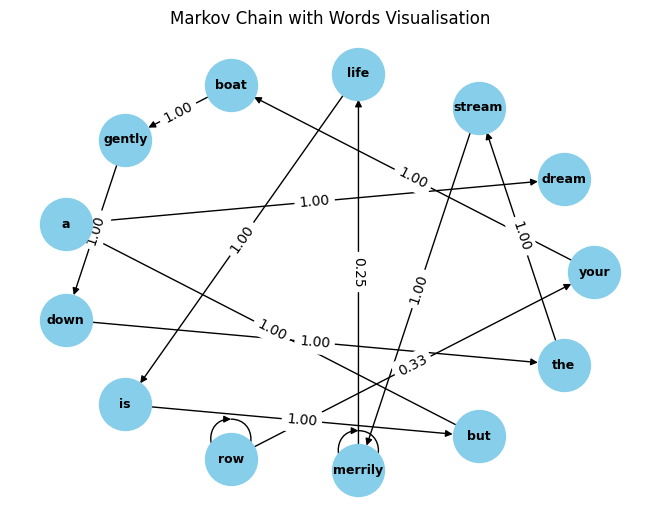

In [6]:
# Split the text into a list of tokens, here these will be words
token_list = nursery_rhyme.split(' ')

# Calculate the markov chain network (aka graph) from a list of tokens
G = calculate_graph_from_token_list(token_list)

# Set up the circular layout for visualization
pos = nx.circular_layout(G)

# Draw the graph with edge labels for probabilities
edge_labels = {edge: f"{G.edges[edge]['weight']:.2f}" for edge in G.edges}
nx.draw(G, pos, with_labels=True, node_size=1400, node_color="skyblue", font_size=9, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Markov Chain with Words Visualisation")
plt.show()

## Visualising a Markov Chain of words

Here we are visualising a Markov Chain based on characters. Here we can set our token_list to be the string variable nursery_rhyme. As strings are just implemented as lists of characters anyway in Python we do not need to do anything here to split our string into characters!

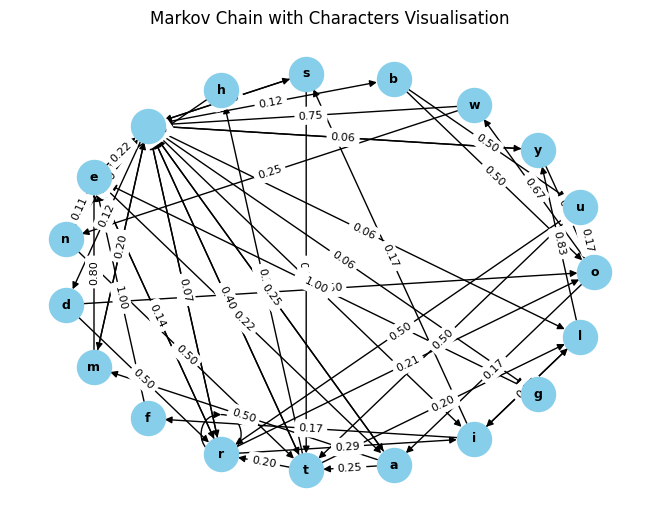

In [7]:
token_list = nursery_rhyme

# Calculate the markov chain network (aka graph) from a list of tokens
G = calculate_graph_from_token_list(token_list)

# Set up the circular layout for visualization
pos = nx.circular_layout(G)

# Draw the graph with edge labels for probabilities
edge_labels = {edge: f"{G.edges[edge]['weight']:.2f}" for edge in G.edges}
nx.draw(G, pos, with_labels=True, node_size=600, node_color="skyblue", font_size=9, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Markov Chain with Characters Visualisation")
plt.show()